                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 2.743e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:55:35   Log-Likelihood:                -93437.
No. Observations:               10840   AIC:                         1.869e+05
Df Residuals:                   10837   BIC:                         1.869e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1400.1632     38.634     36.242      0.0

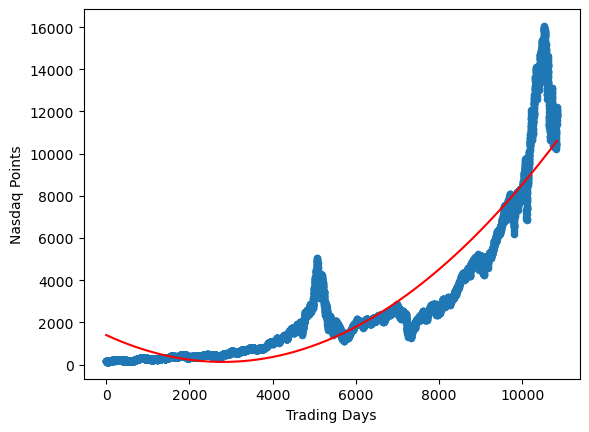

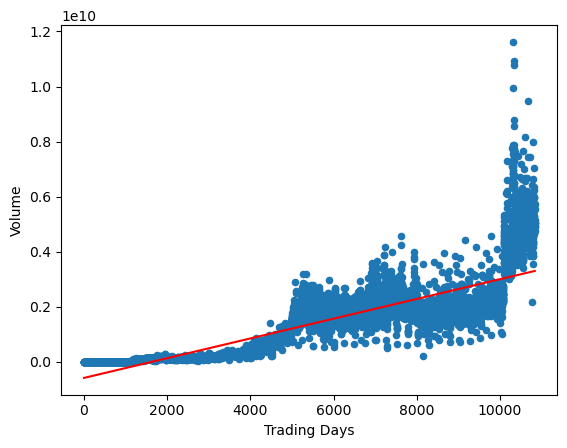

Correlation between Trading Days and Nasdaq points is  0.8058514346671216
Correlation between Trading Days and volume is  0.8058514346671216
856067.6751728281
14023289.278744029
           Date         Open         High          Low        Close  \
1173 1984-10-11   244.199997   244.699997   244.199997   244.699997   
1174 1984-10-12   245.500000   246.199997   245.500000   246.199997   
1175 1984-10-15   246.800003   247.699997   246.800003   247.699997   
1176 1984-10-16   247.800003   247.899994   247.100006   247.300003   
1177 1984-10-17   247.100006   247.100006   246.800003   247.100006   
...         ...          ...          ...          ...          ...   
6523 2005-12-23  2249.409912  2254.709961  2245.580078  2249.419922   
6524 2005-12-27  2253.050049  2259.679932  2226.620117  2226.889893   
6525 2005-12-28  2230.360107  2233.540039  2221.409912  2228.939941   
6526 2005-12-29  2229.600098  2232.889893  2216.979980  2218.159912   
6527 2005-12-30  2209.030029  2209.969971

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind


ixic = pd.read_csv('IXICML.csv')

poly = PolynomialFeatures(degree=2)

x = ixic['TD']
y = ixic['Close']
y1 = ixic['Volume']
x2 = poly.fit_transform(x.values.reshape(-1, 1))


x = sm.add_constant(x)

regression = sm.OLS(y, x2).fit()
quad_model = sm.OLS(y, x2).fit()

print(regression.summary())
print(quad_model)

regression1 = sm.OLS(y1, x).fit()
print(regression1.summary())


ixic.plot.scatter(x='TD', y='Close')
plt.xlabel('Trading Days')
plt.ylabel('Nasdaq Points')

plt.plot(regression.predict(x2), color='red')
plt.show()

ixic.plot.scatter(x='TD', y='Volume')
plt.xlabel('Trading Days')
plt.ylabel('Volume')

plt.plot(regression1.predict(x), color='red')
plt.show()

correlation = ixic['Close'].corr(ixic['TD'])
correlation1 = ixic['Volume'].corr(ixic['TD'])
print("Correlation between Trading Days and Nasdaq points is ",correlation)
print("Correlation between Trading Days and volume is ",correlation)


ixic['Date'] = pd.to_datetime(ixic['Date'])

ixic['Before_2006'] = (ixic['Date'].dt.year < 2006).astype(int)
ixic['After_2006'] = (ixic['Date'].dt.year >= 2006).astype(int)


variance_before_2006 = ixic[ixic['Before_2006'] == 1]['Close'].var()
variance_after_2006 = ixic[ixic['After_2006'] == 1]['Close'].var()

Before_2006 = ixic.iloc[:, :9]
After_2006 = ixic.iloc[:, list(range(8)) + [9]]

Before_2006 = Before_2006.loc[(Before_2006 != 0).all(axis=1)]
After_2006 = After_2006.loc[(After_2006 != 0).all(axis=1)]

print(variance_before_2006)
print(variance_after_2006)

print(Before_2006)
print(After_2006)

print("F-value is ",14023289.278744029/856067.6751728281)

# F-value = 16.381
# After_2006 degree of freedom = 5354 (N-1)
# Before_2006 degree of freedom = 4311 (N-1)

p_value_FStat = f.sf(16.381, 5354, 4311)
print("P-value of F-statistics is ", p_value_FStat)

t_stat = ttest_ind(Before_2006['Close'], After_2006['Close'], equal_var=False)
print(t_stat)



In [8]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                 2.743e+04
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:45:25   Log-Likelihood:                -93437.
No. Observations:               10840   AIC:                         1.869e+05
Df Residuals:                   10837   BIC:                         1.869e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1400.1632     38.634     36.242      0.0